# ZPow Rotation via Phase Gradient

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ZPowConstViaPhaseGradient`
Apply an $Z**t$ on a qubit using a phase gradient state.

This bloq implements a `Z**t` by conditionally loading `t/2` into a quantum
register, conditioned on the qubit `q` (rotation target), and then adding
this value to the phase gradient to get a phase kickback, and uncomputes the load.
This controlled-load trick is taken from Ref. [2], Fig 2a.

See :class:`PhaseGradientState` for details on phase gradients.

It loads an approximation of `t/2` to `phase_grad_bitsize` bits,
which is loaded using `phase_grad_bitsize` clean ancilla.

The total Tofolli cost is `phase_grad_bitsize - 2`.


#### Parameters
 - `exponent`: value of `t` to apply `Z**t`
 - `phase_grad_bitsize`: number of qubits of the phase gradient state. 

#### Registers
 - `q`: qubit to apply rotation on.
 - `phase_grad`: phase gradient state of type `QFxp` with `phase_grad_bitsize` fractional bits. 

#### References
 - [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2001.09580). Haner et al. 2020. Section 3: Components. "Integer addition" and Fig 2a.


In [2]:
from qualtran.bloqs.rotations import ZPowConstViaPhaseGradient

### Example Instances

In [3]:
zpow_const_via_phase_grad = ZPowConstViaPhaseGradient.from_precision(3 / 8, eps=1e-11)

In [4]:
eps = sympy.symbols("eps")
zpow_const_via_phase_grad_symb_prec = ZPowConstViaPhaseGradient.from_precision(3 / 8, eps=eps)

In [5]:
t = sympy.symbols("t")
zpow_const_via_phase_grad_symb_angle = ZPowConstViaPhaseGradient.from_precision(t, eps=1e-11)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([zpow_const_via_phase_grad, zpow_const_via_phase_grad_symb_prec, zpow_const_via_phase_grad_symb_angle],
           ['`zpow_const_via_phase_grad`', '`zpow_const_via_phase_grad_symb_prec`', '`zpow_const_via_phase_grad_symb_angle`'])

### Call Graph

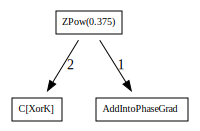

#### Counts totals:
 - `AddIntoPhaseGrad`: 1
 - `C[XorK]`: 2

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
zpow_const_via_phase_grad_g, zpow_const_via_phase_grad_sigma = zpow_const_via_phase_grad.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(zpow_const_via_phase_grad_g)
show_counts_sigma(zpow_const_via_phase_grad_sigma)